# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [10]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [11]:
train, test = keras.datasets.cifar10.load_data()

In [12]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [13]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [14]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 256, 128, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
            x = keras.layers.Dropout(rate = 0.25)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [15]:
"""Code Here
設定超參數
"""
rms = keras.optimizers.RMSprop
ada = keras.optimizers.Adagrad
sgd = keras.optimizers.SGD
adam = keras.optimizers.Adam
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-3]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
OPTIMIZER = [rms, ada, sgd, adam]

In [16]:
import itertools
results = {}
for lr, opt in itertools.product(LEARNING_RATE, OPTIMIZER):
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f, Optimizer = %s" % (lr, str(opt)))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    
    optimizer = opt(lr=lr)
    model.compile(loss="binary_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
 # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "ex- %s" % (str(lr)+str('+')+str(opt))
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with LR = 0.100000, Optimizer = <class 'keras.optimizers.RMSprop'>
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 256)               65792     
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_______________________________________________

Epoch 43/50
50000/50000 [==============================] - 7s 146us/step - loss: 2.7682 - accuracy: 0.8200 - val_loss: 2.7682 - val_accuracy: 0.8200
Epoch 44/50
50000/50000 [==============================] - 8s 152us/step - loss: 2.7682 - accuracy: 0.8200 - val_loss: 2.7682 - val_accuracy: 0.8200
Epoch 45/50
50000/50000 [==============================] - 7s 147us/step - loss: 2.7682 - accuracy: 0.8200 - val_loss: 2.7682 - val_accuracy: 0.8200
Epoch 46/50
50000/50000 [==============================] - 8s 156us/step - loss: 2.7682 - accuracy: 0.8200 - val_loss: 2.7682 - val_accuracy: 0.8200
Epoch 47/50
50000/50000 [==============================] - 8s 154us/step - loss: 2.7682 - accuracy: 0.8200 - val_loss: 2.7682 - val_accuracy: 0.8200
Epoch 48/50
50000/50000 [==============================] - 8s 152us/step - loss: 2.7682 - accuracy: 0.8200 - val_loss: 2.7682 - val_accuracy: 0.8200
Epoch 49/50
50000/50000 [==============================] - 8s 150us/step - loss: 2.7682 - accuracy: 0.8200

50000/50000 [==============================] - 9s 171us/step - loss: 2.7682 - accuracy: 0.8200 - val_loss: 2.7682 - val_accuracy: 0.8200
Epoch 36/50
50000/50000 [==============================] - 8s 170us/step - loss: 2.7682 - accuracy: 0.8200 - val_loss: 2.7682 - val_accuracy: 0.8200
Epoch 37/50
50000/50000 [==============================] - 9s 172us/step - loss: 2.7682 - accuracy: 0.8200 - val_loss: 2.7682 - val_accuracy: 0.8200
Epoch 38/50
50000/50000 [==============================] - 8s 158us/step - loss: 2.7682 - accuracy: 0.8200 - val_loss: 2.7682 - val_accuracy: 0.8200
Epoch 39/50
50000/50000 [==============================] - 8s 152us/step - loss: 2.7682 - accuracy: 0.8200 - val_loss: 2.7682 - val_accuracy: 0.8200
Epoch 40/50
50000/50000 [==============================] - 7s 150us/step - loss: 2.7682 - accuracy: 0.8200 - val_loss: 2.7682 - val_accuracy: 0.8200
Epoch 41/50
50000/50000 [==============================] - 8s 151us/step - loss: 2.7682 - accuracy: 0.8200 - val_loss:

50000/50000 [==============================] - 7s 136us/step - loss: 0.2419 - accuracy: 0.9084 - val_loss: 0.2428 - val_accuracy: 0.9078
Epoch 28/50
50000/50000 [==============================] - 7s 145us/step - loss: 0.2408 - accuracy: 0.9089 - val_loss: 0.2318 - val_accuracy: 0.9106
Epoch 29/50
50000/50000 [==============================] - 8s 156us/step - loss: 0.2394 - accuracy: 0.9095 - val_loss: 0.2372 - val_accuracy: 0.9106
Epoch 30/50
50000/50000 [==============================] - 7s 143us/step - loss: 0.2381 - accuracy: 0.9097 - val_loss: 0.2274 - val_accuracy: 0.9130
Epoch 31/50
50000/50000 [==============================] - 7s 139us/step - loss: 0.2367 - accuracy: 0.9101 - val_loss: 0.2389 - val_accuracy: 0.9102
Epoch 32/50
50000/50000 [==============================] - 8s 159us/step - loss: 0.2352 - accuracy: 0.9106 - val_loss: 0.2353 - val_accuracy: 0.9105
Epoch 33/50
50000/50000 [==============================] - 9s 171us/step - loss: 0.2348 - accuracy: 0.9107 - val_loss:

50000/50000 [==============================] - 6s 125us/step - loss: 2.7687 - accuracy: 0.8200 - val_loss: 2.7682 - val_accuracy: 0.8200
Epoch 20/50
50000/50000 [==============================] - 6s 124us/step - loss: 2.7665 - accuracy: 0.8201 - val_loss: 2.7682 - val_accuracy: 0.8200
Epoch 21/50
50000/50000 [==============================] - 7s 132us/step - loss: 2.7665 - accuracy: 0.8201 - val_loss: 2.7682 - val_accuracy: 0.8200
Epoch 22/50
50000/50000 [==============================] - 7s 131us/step - loss: 2.7684 - accuracy: 0.8200 - val_loss: 2.7682 - val_accuracy: 0.8200
Epoch 23/50
50000/50000 [==============================] - 6s 128us/step - loss: 2.7700 - accuracy: 0.8199 - val_loss: 2.7682 - val_accuracy: 0.8200
Epoch 24/50
50000/50000 [==============================] - 7s 131us/step - loss: 2.7658 - accuracy: 0.8202 - val_loss: 2.7682 - val_accuracy: 0.8200
Epoch 25/50
50000/50000 [==============================] - 7s 131us/step - loss: 2.7687 - accuracy: 0.8200 - val_loss:

50000/50000 [==============================] - 6s 118us/step - loss: 2.7682 - accuracy: 0.8200 - val_loss: 2.7682 - val_accuracy: 0.8200
Epoch 12/50
50000/50000 [==============================] - 5s 110us/step - loss: 2.7682 - accuracy: 0.8200 - val_loss: 2.7682 - val_accuracy: 0.8200
Epoch 13/50
50000/50000 [==============================] - 5s 108us/step - loss: 2.7682 - accuracy: 0.8200 - val_loss: 2.7682 - val_accuracy: 0.8200
Epoch 14/50
50000/50000 [==============================] - 5s 110us/step - loss: 2.7682 - accuracy: 0.8200 - val_loss: 2.7682 - val_accuracy: 0.8200
Epoch 15/50
50000/50000 [==============================] - 5s 108us/step - loss: 2.7682 - accuracy: 0.8200 - val_loss: 2.7682 - val_accuracy: 0.8200
Epoch 16/50
50000/50000 [==============================] - 5s 108us/step - loss: 2.7682 - accuracy: 0.8200 - val_loss: 2.7682 - val_accuracy: 0.8200
Epoch 17/50
50000/50000 [==============================] - 6s 111us/step - loss: 2.7682 - accuracy: 0.8200 - val_loss:

50000/50000 [==============================] - 5s 102us/step - loss: 0.2739 - accuracy: 0.9016 - val_loss: 0.2636 - val_accuracy: 0.9037
Epoch 4/50
50000/50000 [==============================] - 5s 104us/step - loss: 0.2667 - accuracy: 0.9028 - val_loss: 0.2658 - val_accuracy: 0.9026
Epoch 5/50
50000/50000 [==============================] - 5s 101us/step - loss: 0.2612 - accuracy: 0.9039 - val_loss: 0.2535 - val_accuracy: 0.9057
Epoch 6/50
50000/50000 [==============================] - 5s 101us/step - loss: 0.2566 - accuracy: 0.9051 - val_loss: 0.2519 - val_accuracy: 0.9066
Epoch 7/50
50000/50000 [==============================] - 5s 103us/step - loss: 0.2529 - accuracy: 0.9059 - val_loss: 0.2451 - val_accuracy: 0.9077
Epoch 8/50
50000/50000 [==============================] - 5s 102us/step - loss: 0.2496 - accuracy: 0.9069 - val_loss: 0.2485 - val_accuracy: 0.9072
Epoch 9/50
50000/50000 [==============================] - 5s 101us/step - loss: 0.2463 - accuracy: 0.9081 - val_loss: 0.238

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 5s 96us/step - loss: 0.3281 - accuracy: 0.9000 - val_loss: 0.3240 - val_accuracy: 0.9000
Epoch 2/50
50000/50000 [==============================] - 5s 92us/step - loss: 0.3253 - accuracy: 0.9000 - val_loss: 0.3221 - val_accuracy: 0.9000
Epoch 3/50
50000/50000 [==============================] - 5s 92us/step - loss: 0.3235 - accuracy: 0.9000 - val_loss: 0.3200 - val_accuracy: 0.9000
Epoch 4/50
50000/50000 [==============================] - 5s 95us/step - loss: 0.3224 - accuracy: 0.9000 - val_loss: 0.3182 - val_accuracy: 0.9000
Epoch 5/50
50000/50000 [==============================] - 5s 92us/step - loss: 0.3210 - accuracy: 0.9000 - val_loss: 0.3164 - val_accuracy: 0.9000
Epoch 6/50
50000/50000 [==============================] - 5s 92us/step - loss: 0.3196 - accuracy: 0.9000 - val_loss: 0.3146 - val_accuracy: 0.9000
Epoch 7/50
50000/50000 [==============================] - 5s 93us/st

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 6s 129us/step - loss: 0.3595 - accuracy: 0.8974 - val_loss: 0.2978 - val_accuracy: 0.8997
Epoch 2/50
50000/50000 [==============================] - 6s 123us/step - loss: 0.3002 - accuracy: 0.8998 - val_loss: 0.2953 - val_accuracy: 0.9000
Epoch 3/50
50000/50000 [==============================] - 6s 123us/step - loss: 0.2992 - accuracy: 0.8999 - val_loss: 0.2953 - val_accuracy: 0.9000
Epoch 4/50
50000/50000 [==============================] - 6s 124us/step - loss: 0.2981 - accuracy: 0.8999 - val_loss: 0.2976 - val_accuracy: 0.9000
Epoch 5/50
50000/50000 [==============================] - 6s 122us/step - loss: 0.2985 - accuracy: 0.8999 - val_loss: 0.3022 - val_accuracy: 0.9000
Epoch 6/50
50000/50000 [==============================] - 6s 124us/step - loss: 0.2980 - accuracy: 0.8998 - val_loss: 0.2995 - val_accuracy: 0.9000accuracy: 0.89
Epoch 7/50
50000/50000 [========================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 6s 115us/step - loss: 0.3131 - accuracy: 0.8993 - val_loss: 0.2899 - val_accuracy: 0.9009
Epoch 2/50
50000/50000 [==============================] - 6s 112us/step - loss: 0.2905 - accuracy: 0.8999 - val_loss: 0.2982 - val_accuracy: 0.8999
Epoch 3/50
50000/50000 [==============================] - 6s 113us/step - loss: 0.2799 - accuracy: 0.9011 - val_loss: 0.2777 - val_accuracy: 0.9030
Epoch 4/50
50000/50000 [==============================] - 6s 111us/step - loss: 0.2732 - accuracy: 0.9021 - val_loss: 0.2689 - val_accuracy: 0.9023
Epoch 5/50
50000/50000 [==============================] - 6s 111us/step - loss: 0.2677 - accuracy: 0.9031 - val_loss: 0.2699 - val_accuracy: 0.9022
Epoch 6/50
50000/50000 [==============================] - 6s 113us/step - loss: 0.2636 - accuracy: 0.9039 - val_loss: 0.2563 - val_accuracy: 0.9052
Epoch 7/50
50000/50000 [==============================] - 6s 1

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 5s 109us/step - loss: 0.3079 - accuracy: 0.8999 - val_loss: 0.2903 - val_accuracy: 0.9010
Epoch 2/50
50000/50000 [==============================] - 5s 102us/step - loss: 0.2901 - accuracy: 0.9001 - val_loss: 0.2772 - val_accuracy: 0.9013
Epoch 3/50
50000/50000 [==============================] - 5s 101us/step - loss: 0.2826 - accuracy: 0.9004 - val_loss: 0.2724 - val_accuracy: 0.9017
Epoch 4/50
50000/50000 [==============================] - 5s 109us/step - loss: 0.2770 - accuracy: 0.9009 - val_loss: 0.2640 - val_accuracy: 0.9033
Epoch 5/50
50000/50000 [==============================] - 5s 102us/step - loss: 0.2729 - accuracy: 0.9017 - val_loss: 0.2603 - val_accuracy: 0.9041
Epoch 6/50
50000/50000 [==============================] - 5s 102us/step - loss: 0.2694 - accuracy: 0.9020 - val_loss: 0.2564 - val_accuracy: 0.9049
Epoch 7/50
50000/50000 [==============================] - 5s 1

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 5s 97us/step - loss: 0.3318 - accuracy: 0.9000 - val_loss: 0.3267 - val_accuracy: 0.9000
Epoch 2/50
50000/50000 [==============================] - 5s 93us/step - loss: 0.3304 - accuracy: 0.9000 - val_loss: 0.3260 - val_accuracy: 0.9000
Epoch 3/50
50000/50000 [==============================] - 5s 92us/step - loss: 0.3296 - accuracy: 0.9000 - val_loss: 0.3256 - val_accuracy: 0.9000
Epoch 4/50
50000/50000 [==============================] - 5s 93us/step - loss: 0.3289 - accuracy: 0.9000 - val_loss: 0.3253 - val_accuracy: 0.9000
Epoch 5/50
50000/50000 [==============================] - 5s 93us/step - loss: 0.3283 - accuracy: 0.9000 - val_loss: 0.3251 - val_accuracy: 0.9000
Epoch 6/50
50000/50000 [==============================] - 5s 93us/step - loss: 0.3279 - accuracy: 0.9000 - val_loss: 0.3249 - val_accuracy: 0.9000
Epoch 7/50
50000/50000 [==============================] - 5s 92us/st

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 6s 127us/step - loss: 0.3020 - accuracy: 0.9002 - val_loss: 0.2756 - val_accuracy: 0.9014
Epoch 2/50
50000/50000 [==============================] - 6s 125us/step - loss: 0.2774 - accuracy: 0.9012 - val_loss: 0.2614 - val_accuracy: 0.9049
Epoch 3/50
50000/50000 [==============================] - 6s 124us/step - loss: 0.2669 - accuracy: 0.9033 - val_loss: 0.2553 - val_accuracy: 0.9055
Epoch 4/50
50000/50000 [==============================] - 6s 123us/step - loss: 0.2590 - accuracy: 0.9052 - val_loss: 0.2502 - val_accuracy: 0.9068
Epoch 5/50
50000/50000 [==============================] - 6s 124us/step - loss: 0.2527 - accuracy: 0.9064 - val_loss: 0.2426 - val_accuracy: 0.9096
Epoch 6/50
50000/50000 [==============================] - 6s 123us/step - loss: 0.2468 - accuracy: 0.9080 - val_loss: 0.2402 - val_accuracy: 0.9097
Epoch 7/50
50000/50000 [==============================] - 6s 1

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 6s 114us/step - loss: 0.3155 - accuracy: 0.8995 - val_loss: 0.3000 - val_accuracy: 0.9002
Epoch 2/50
50000/50000 [==============================] - 6s 112us/step - loss: 0.2917 - accuracy: 0.9000 - val_loss: 0.2859 - val_accuracy: 0.9010
Epoch 3/50
50000/50000 [==============================] - 6s 113us/step - loss: 0.2803 - accuracy: 0.9008 - val_loss: 0.2738 - val_accuracy: 0.9029
Epoch 4/50
50000/50000 [==============================] - 6s 115us/step - loss: 0.2740 - accuracy: 0.9016 - val_loss: 0.2819 - val_accuracy: 0.9024
Epoch 5/50
50000/50000 [==============================] - 6s 115us/step - loss: 0.2678 - accuracy: 0.9031 - val_loss: 0.2725 - val_accuracy: 0.9027
Epoch 6/50
50000/50000 [==============================] - 6s 125us/step - loss: 0.2623 - accuracy: 0.9042 - val_loss: 0.2792 - val_accuracy: 0.8964
Epoch 7/50
50000/50000 [==============================] - 6s 1

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 5s 107us/step - loss: 0.3112 - accuracy: 0.8999 - val_loss: 0.2909 - val_accuracy: 0.9000
Epoch 2/50
50000/50000 [==============================] - 5s 103us/step - loss: 0.2915 - accuracy: 0.9000 - val_loss: 0.2789 - val_accuracy: 0.9009
Epoch 3/50
50000/50000 [==============================] - 5s 102us/step - loss: 0.2832 - accuracy: 0.9004 - val_loss: 0.2716 - val_accuracy: 0.9017
Epoch 4/50
50000/50000 [==============================] - 5s 104us/step - loss: 0.2778 - accuracy: 0.9008 - val_loss: 0.2642 - val_accuracy: 0.9031
Epoch 5/50
50000/50000 [==============================] - 5s 105us/step - loss: 0.2742 - accuracy: 0.9014 - val_loss: 0.2616 - val_accuracy: 0.9035
Epoch 6/50
50000/50000 [==============================] - 5s 103us/step - loss: 0.2701 - accuracy: 0.9019 - val_loss: 0.2563 - val_accuracy: 0.9050
Epoch 7/50
50000/50000 [==============================] - 5s 1

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 5s 97us/step - loss: 0.3309 - accuracy: 0.9000 - val_loss: 0.3258 - val_accuracy: 0.9000
Epoch 2/50
50000/50000 [==============================] - 5s 92us/step - loss: 0.3293 - accuracy: 0.9000 - val_loss: 0.3254 - val_accuracy: 0.9000
Epoch 3/50
50000/50000 [==============================] - 5s 92us/step - loss: 0.3286 - accuracy: 0.9000 - val_loss: 0.3251 - val_accuracy: 0.9000
Epoch 4/50
50000/50000 [==============================] - 5s 94us/step - loss: 0.3280 - accuracy: 0.9000 - val_loss: 0.3248 - val_accuracy: 0.9000
Epoch 5/50
50000/50000 [==============================] - 5s 92us/step - loss: 0.3275 - accuracy: 0.9000 - val_loss: 0.3246 - val_accuracy: 0.9000
Epoch 6/50
50000/50000 [==============================] - 5s 91us/step - loss: 0.3269 - accuracy: 0.9000 - val_loss: 0.3243 - val_accuracy: 0.9000
Epoch 7/50
50000/50000 [==============================] - 5s 92us/st

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 6s 129us/step - loss: 0.3023 - accuracy: 0.8998 - val_loss: 0.2812 - val_accuracy: 0.9006
Epoch 2/50
50000/50000 [==============================] - 6s 124us/step - loss: 0.2777 - accuracy: 0.9012 - val_loss: 0.2611 - val_accuracy: 0.9048
Epoch 3/50
50000/50000 [==============================] - 6s 123us/step - loss: 0.2657 - accuracy: 0.9032 - val_loss: 0.2526 - val_accuracy: 0.9059
Epoch 4/50
50000/50000 [==============================] - 6s 125us/step - loss: 0.2590 - accuracy: 0.9045 - val_loss: 0.2518 - val_accuracy: 0.9062
Epoch 5/50
50000/50000 [==============================] - 6s 123us/step - loss: 0.2521 - accuracy: 0.9064 - val_loss: 0.2448 - val_accuracy: 0.9089
Epoch 6/50
50000/50000 [==============================] - 6s 125us/step - loss: 0.2468 - accuracy: 0.9081 - val_loss: 0.2402 - val_accuracy: 0.9091
Epoch 7/50
50000/50000 [==============================] - 6s 1

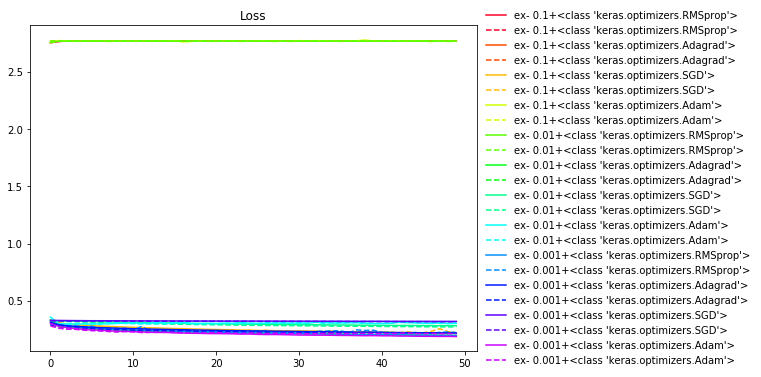

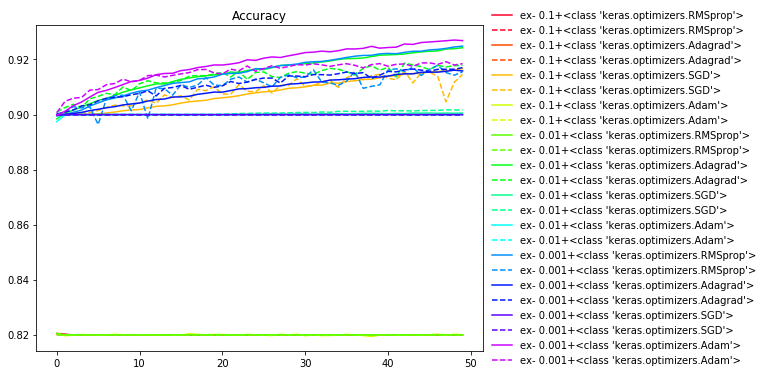

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

"""
將實驗結果繪出
"""
NUM_COLORS = len(results.keys())
cm = plt.get_cmap('gist_rainbow')
color_bar = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]

#figure()
#ax = gca()
#ax.set_position([0,0,0.8,1])

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False) #plt.legend(loc='best',frameon=False)
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)
plt.show()